In [317]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.markers
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
import pandas as pd
from sklearn import datasets,neighbors
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier

In [352]:
#importing data file
incidents=pd.read_csv('Master_Data_clustering_and_regression.csv',encoding='latin1')

In [353]:
#Supervised Learning- Linear regression
Acc_tot=incidents['Total number of incidents']
Acc_tot_Class=incidents['Class_Total_inc']
temp=incidents['Mean Temp (°C)']
rain=incidents['Total Rain (mm)']
snow=incidents['Total Snow (cm)']
wind=incidents['Spd of Max Gust (km/h)']

#data consilidation
data_tot_acc=np.zeros((948,4))
target_tot_acc=np.zeros(948)

count=0

while count<948:
    data_tot_acc[count,0]=temp[count]
    data_tot_acc[count,1]=rain[count]
    data_tot_acc[count,2]=snow[count]
    data_tot_acc[count,3]=wind[count]
    target_tot_acc[count]=Acc_tot[count]
    count=count+1

#training and testing sets
data_train=data_tot_acc[0:948:2,:]
data_test=data_tot_acc[1:948:2,:]
target_train=target_tot_acc[0:948:2]
target_test=target_tot_acc[1:948:2]
temp_train=temp[0:948:2]
temp_test=temp[1:948:2]
snow_train=snow[0:948:2]
snow_test=snow[1:948:2]
wind_train=wind[0:948:2]
wind_test=wind[1:948:2]
rain_train=rain[0:948:2]
rain_test=rain[1:948:2]

Temperature Coefficient = -0.2371941033244696
Intercept = 16.865418307741532
Training set Least squares error = 29237.253595350736
Testing set Least squares error = 25602.307420344063
Global Least squares error = 54839.561015694824


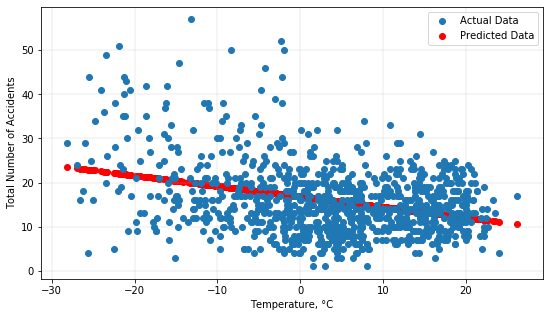

In [354]:
#Linear regression: Model 1: Y (accidents)=aX(Temp)+b

ones=np.ones(474)

#Training
Y=target_train
X=np.array([temp_train,ones])
A_T=np.dot(np.linalg.inv(np.dot(X,X.T)),np.dot(X,Y.T))
A=A_T.T
Y_predict=np.dot(A,X)
E=np.dot(Y-Y_predict,Y-Y_predict)

#Testing
Y_test=target_test
X_test=np.array([temp_test,ones])
Y_test_predict=np.dot(A,X_test)
E_test=np.dot(Y_test-Y_test_predict,Y_test-Y_test_predict)

#Whole Data
ones_all=np.ones(948)
Y_all= target_tot_acc
X_all=np.array([temp,ones_all])
Y_predict_all=np.dot(A,X_all)
E_global=np.dot(Y_predict_all-Y_all,Y_predict_all-Y_all)

print('Temperature Coefficient = '+str(A[0]))
print('Intercept = '+str(A[1]))
print('Training set Least squares error = '+str(E))
print('Testing set Least squares error = '+str(E_test))
print('Global Least squares error = '+str(E_global))

#Plotting
fig, ax=plt.subplots(figsize=(9,5))
plt.grid(linewidth=0.25)
Scatter, =ax.plot(temp,Y_all,'o',label="Actual Data")
ax.scatter(temp,Y_predict_all,color='red',label="Predicted Data")
ax.set_xlabel('Temperature, °C')
ax.set_ylabel('Total Number of Accidents')
ax.legend()
plt.show()

Snow Coefficient = 1.265774703738914
Intercept = 15.296212841580966
Training set Least squares error = 28609.176030042014
Testing set Least squares error = 24272.08231841145
Global Least squares error = 52881.25834845345


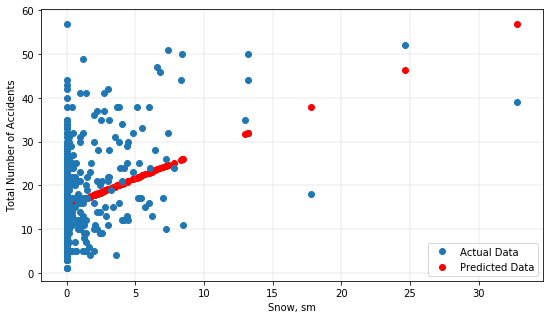

In [355]:
#Linear regression: Model 2: Y (accidents)=aX(Snow)+b

ones=np.ones(474)

#Training
Y=target_train
X=np.array([snow_train,ones])
A_T=np.dot(np.linalg.inv(np.dot(X,X.T)),np.dot(X,Y.T))
A=A_T.T
Y_predict=np.dot(A,X)
E=np.dot(Y-Y_predict,Y-Y_predict)

#Testing
Y_test=target_test
X_test=np.array([snow_test,ones])
Y_test_predict=np.dot(A,X_test)
E_test=np.dot(Y_test-Y_test_predict,Y_test-Y_test_predict)

#Whole Data
ones_all=np.ones(948)
Y_all= target_tot_acc
X_all=np.array([snow,ones_all])
Y_predict_all=np.dot(A,X_all)
E_global=np.dot(Y_predict_all-Y_all,Y_predict_all-Y_all)

print('Snow Coefficient = '+str(A[0]))
print('Intercept = '+str(A[1]))
print('Training set Least squares error = '+str(E))
print('Testing set Least squares error = '+str(E_test))
print('Global Least squares error = '+str(E_global))

#Plotting
fig, ax=plt.subplots(figsize=(9,5))
plt.grid(linewidth=0.25)
Scatter, =ax.plot(snow,Y_all,'o',label="Actual Data")
ax.scatter(snow,Y_predict_all,color='red',label="Predicted Data")
ax.set_xlabel('Snow, sm')
ax.set_ylabel('Total Number of Accidents')
ax.legend()
plt.show()

Rain Coefficient = -0.08121778096466636
Intercept = 16.041129288478782
Training set Least squares error = 32553.38651387372
Testing set Least squares error = 28675.828805349465
Global Least squares error = 61229.21531922319


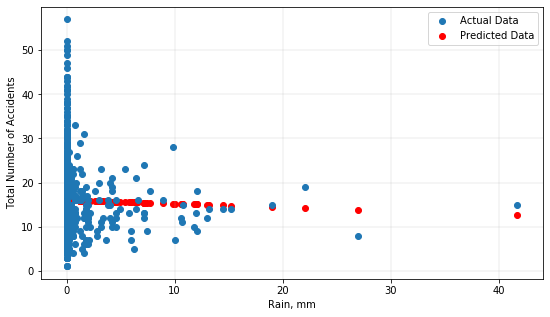

In [356]:
#Linear regression: Model 3: Y (accidents)=aX(rain)+b

ones=np.ones(474)

#Training
Y=target_train
X=np.array([rain_train,ones])
A_T=np.dot(np.linalg.inv(np.dot(X,X.T)),np.dot(X,Y.T))
A=A_T.T
Y_predict=np.dot(A,X)
E=np.dot(Y-Y_predict,Y-Y_predict)

#Testing
Y_test=target_test
X_test=np.array([rain_test,ones])
Y_test_predict=np.dot(A,X_test)
E_test=np.dot(Y_test-Y_test_predict,Y_test-Y_test_predict)

#Whole Data
ones_all=np.ones(948)
Y_all= target_tot_acc
X_all=np.array([rain,ones_all])
Y_predict_all=np.dot(A,X_all)
E_global=np.dot(Y_predict_all-Y_all,Y_predict_all-Y_all)

print('Rain Coefficient = '+str(A[0]))
print('Intercept = '+str(A[1]))
print('Training set Least squares error = '+str(E))
print('Testing set Least squares error = '+str(E_test))
print('Global Least squares error = '+str(E_global))

#Plotting
fig, ax=plt.subplots(figsize=(9,5))
plt.grid(linewidth=0.25)
Scatter, =ax.plot(rain,Y_all,'o',label="Actual Data")
ax.scatter(rain,Y_predict_all,color='red',label="Predicted Data")
ax.set_xlabel('Rain, mm')
ax.set_ylabel('Total Number of Accidents')
ax.legend()
plt.show()

Wind Coefficient = -0.11180796900491163
Intercept = 20.561784116437124
Training set Least squares error = 31137.79537443187
Testing set Least squares error = 28973.809047116672
Global Least squares error = 60111.60442154855


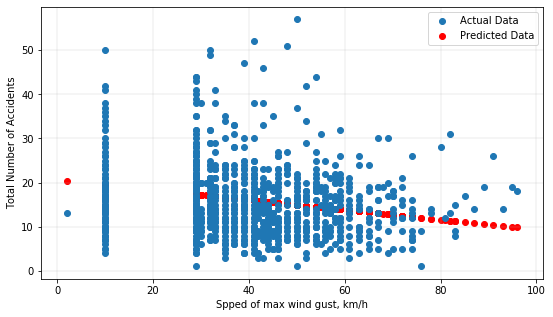

In [357]:
#Linear regression: Model 4: Y (accidents)=aX(wind)+b

ones=np.ones(474)

#Training
Y=target_train
X=np.array([wind_train,ones])
A_T=np.dot(np.linalg.inv(np.dot(X,X.T)),np.dot(X,Y.T))
A=A_T.T
Y_predict=np.dot(A,X)
E=np.dot(Y-Y_predict,Y-Y_predict)

#Testing
Y_test=target_test
X_test=np.array([wind_test,ones])
Y_test_predict=np.dot(A,X_test)
E_test=np.dot(Y_test-Y_test_predict,Y_test-Y_test_predict)

#Whole Data
ones_all=np.ones(948)
Y_all= target_tot_acc
X_all=np.array([wind,ones_all])
Y_predict_all=np.dot(A,X_all)
E_global=np.dot(Y_predict_all-Y_all,Y_predict_all-Y_all)

print('Wind Coefficient = '+str(A[0]))
print('Intercept = '+str(A[1]))
print('Training set Least squares error = '+str(E))
print('Testing set Least squares error = '+str(E_test))
print('Global Least squares error = '+str(E_global))

#Plotting
fig, ax=plt.subplots(figsize=(9,5))
plt.grid(linewidth=0.25)
Scatter, =ax.plot(wind,Y_all,'o',label="Actual Data")
ax.scatter(wind,Y_predict_all,color='red',label="Predicted Data")
ax.set_xlabel('Spped of max wind gust, km/h')
ax.set_ylabel('Total Number of Accidents')
ax.legend()
plt.show()

Temperature Coefficient = 0.00891437841865772
Intercept = 14.750825112975548
Training set Least squares error = 31708.01012244242
Testing set Least squares error = 28319.53344506999
Global Least squares error = 60027.5435675124


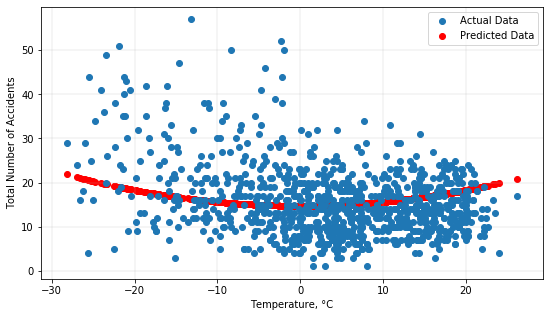

In [358]:
#Linear regression: Model 5: Y (accidents)=aX^2(Temp)+b

ones=np.ones(474)

#Training
Y=target_train
X=np.array([np.multiply(temp_train,temp_train),ones])
A_T=np.dot(np.linalg.inv(np.dot(X,X.T)),np.dot(X,Y.T))
A=A_T.T
Y_predict=np.dot(A,X)
E=np.dot(Y-Y_predict,Y-Y_predict)

#Testing
Y_test=target_test
X_test=np.array([np.multiply(temp_test,temp_test),ones])
Y_test_predict=np.dot(A,X_test)
E_test=np.dot(Y_test-Y_test_predict,Y_test-Y_test_predict)

#Whole Data
ones_all=np.ones(948)
Y_all= target_tot_acc
X_all=np.array([np.multiply(temp,temp),ones_all])
Y_predict_all=np.dot(A,X_all)
E_global=np.dot(Y_predict_all-Y_all,Y_predict_all-Y_all)

print('Temperature Coefficient = '+str(A[0]))
print('Intercept = '+str(A[1]))
print('Training set Least squares error = '+str(E))
print('Testing set Least squares error = '+str(E_test))
print('Global Least squares error = '+str(E_global))

#Plotting
fig, ax=plt.subplots(figsize=(9,5))
plt.grid(linewidth=0.25)
Scatter, =ax.plot(temp,Y_all,'o',label="Actual Data")
ax.scatter(temp,Y_predict_all,color='red',label="Predicted Data")
ax.set_xlabel('Temperature, °C')
ax.set_ylabel('Total Number of Accidents')
ax.legend()
plt.show()

Temperature Coefficient = -0.18487037045739596
snow Coefficient = 1.0435716897633003
Intercept = 16.100642136757635
Training set Least squares error = 26701.52349180505
Testing set Least squares error = 22716.334933931328
Global Least squares error = 49417.85842573636


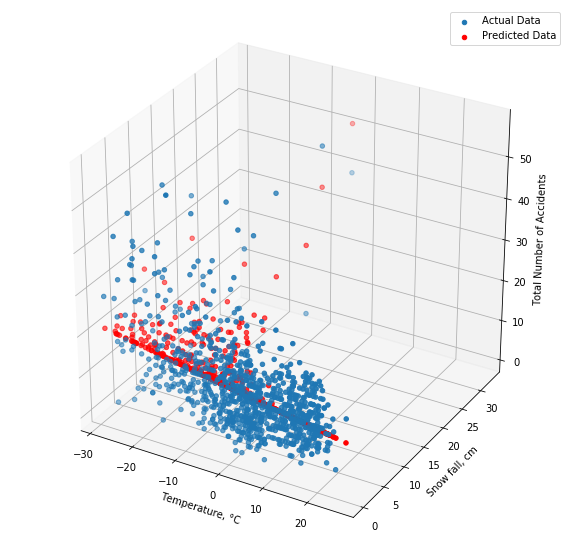

In [359]:

#Linear regression: Model 6: Y (accidents)=aX1(Temp)+bX2(snow)+C

ones=np.ones(474)

#Training
Y=target_train
X=np.array([temp_train,snow_train,ones])
A_T=np.dot(np.linalg.inv(np.dot(X,X.T)),np.dot(X,Y.T))
A=A_T.T
Y_predict=np.dot(A,X)
E=np.dot(Y-Y_predict,Y-Y_predict)

#Testing
Y_test=target_test
X_test=np.array([temp_test,snow_test,ones])
Y_test_predict=np.dot(A,X_test)
E_test=np.dot(Y_test-Y_test_predict,Y_test-Y_test_predict)

#Whole Data
ones_all=np.ones(948)
Y_all= target_tot_acc
X_all=np.array([temp,snow,ones_all])
Y_predict_all=np.dot(A,X_all)
E_global=np.dot(Y_predict_all-Y_all,Y_predict_all-Y_all)

print('Temperature Coefficient = '+str(A[0]))
print('snow Coefficient = '+str(A[1]))
print('Intercept = '+str(A[2]))
print('Training set Least squares error = '+str(E))
print('Testing set Least squares error = '+str(E_test))
print('Global Least squares error = '+str(E_global))

#Plotting
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(temp,snow,Y_all,label='Actual Data')
ax.scatter3D(temp,snow,Y_predict_all, label='Predicted Data',color='red')
ax.set_xlabel('Temperature, °C')
ax.set_ylabel('Snow fall, cm')
ax.set_zlabel('Total Number of Accidents')
ax.legend()
plt.show()

Temperature Coefficient = -0.23956558676444897
Rain Coefficient = 0.06116221131124311
Intercept = 16.835259571096408
Training set Least squares error = 29223.091988903907
Testing set Least squares error = 25649.48415620994
Global Least squares error = 54872.576145113846


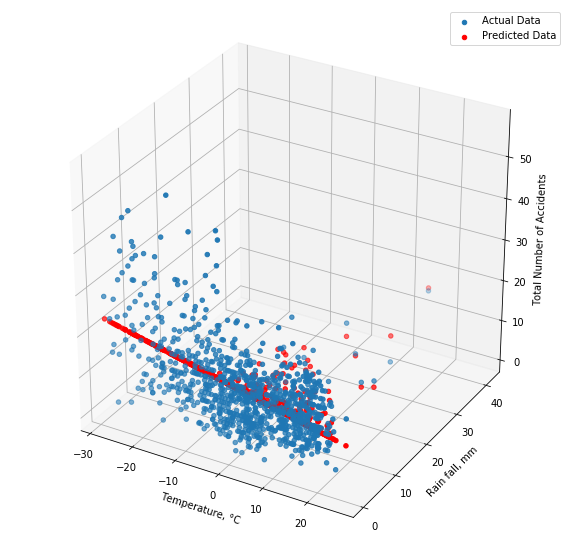

In [360]:
#Linear regression: Model 7: Y (accidents)=aX1(Temp)+bX2(rain)+C

ones=np.ones(474)

#Training
Y=target_train
X=np.array([temp_train,rain_train,ones])
A_T=np.dot(np.linalg.inv(np.dot(X,X.T)),np.dot(X,Y.T))
A=A_T.T
Y_predict=np.dot(A,X)
E=np.dot(Y-Y_predict,Y-Y_predict)

#Testing
Y_test=target_test
X_test=np.array([temp_test,rain_test,ones])
Y_test_predict=np.dot(A,X_test)
E_test=np.dot(Y_test-Y_test_predict,Y_test-Y_test_predict)

#Whole Data
ones_all=np.ones(948)
Y_all= target_tot_acc
X_all=np.array([temp,rain,ones_all])
Y_predict_all=np.dot(A,X_all)
E_global=np.dot(Y_predict_all-Y_all,Y_predict_all-Y_all)

print('Temperature Coefficient = '+str(A[0]))
print('Rain Coefficient = '+str(A[1]))
print('Intercept = '+str(A[2]))
print('Training set Least squares error = '+str(E))
print('Testing set Least squares error = '+str(E_test))
print('Global Least squares error = '+str(E_global))

#Plotting
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(temp,rain,Y_all,label='Actual Data')
ax.scatter3D(temp,rain,Y_predict_all, label='Predicted Data',color='red')
ax.set_xlabel('Temperature, °C')
ax.set_ylabel('Rain fall, mm')
ax.set_zlabel('Total Number of Accidents')
ax.legend()
plt.show()

Temperature Coefficient = -0.20811924882989274
wind Coefficient = -0.05866560723504488
Intercept = 19.157145307427896
Training set Least squares error = 28890.700834083073
Testing set Least squares error = 26021.89215502321
Global Least squares error = 54912.59298910632


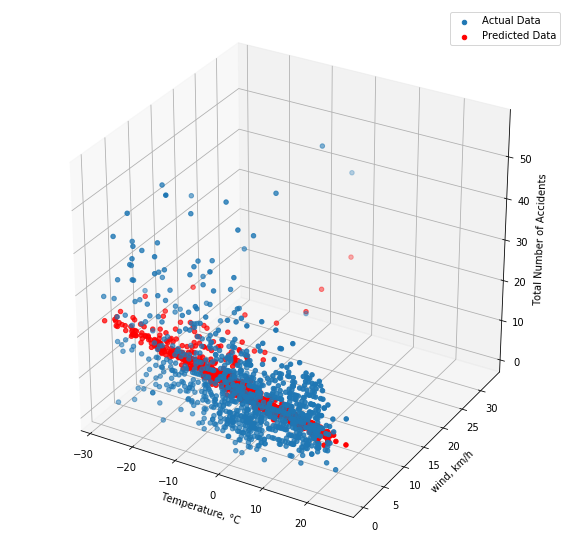

In [361]:
#Linear regression: Model 8: Y (accidents)=aX1(Temp)+bX2(wind)+C

ones=np.ones(474)

#Training
Y=target_train
X=np.array([temp_train,wind_train,ones])
A_T=np.dot(np.linalg.inv(np.dot(X,X.T)),np.dot(X,Y.T))
A=A_T.T
Y_predict=np.dot(A,X)
E=np.dot(Y-Y_predict,Y-Y_predict)

#Testing
Y_test=target_test
X_test=np.array([temp_test,wind_test,ones])
Y_test_predict=np.dot(A,X_test)
E_test=np.dot(Y_test-Y_test_predict,Y_test-Y_test_predict)

#Whole Data
ones_all=np.ones(948)
Y_all= target_tot_acc
X_all=np.array([temp,wind,ones_all])
Y_predict_all=np.dot(A,X_all)
E_global=np.dot(Y_predict_all-Y_all,Y_predict_all-Y_all)

print('Temperature Coefficient = '+str(A[0]))
print('wind Coefficient = '+str(A[1]))
print('Intercept = '+str(A[2]))
print('Training set Least squares error = '+str(E))
print('Testing set Least squares error = '+str(E_test))
print('Global Least squares error = '+str(E_global))

#Plotting
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(temp,snow,Y_all,label='Actual Data')
ax.scatter3D(temp,snow,Y_predict_all, label='Predicted Data',color='red')
ax.set_xlabel('Temperature, °C')
ax.set_ylabel('wind, km/h')
ax.set_zlabel('Total Number of Accidents')
ax.legend()
plt.show()

wind Coefficient = -0.08775548322237103
snow Coefficient = 1.1827406406846759
Intercept = 18.93040678578214
Training set Least squares error = 27738.463939029738
Testing set Least squares error = 24546.21527962385
Global Least squares error = 52284.679218653604


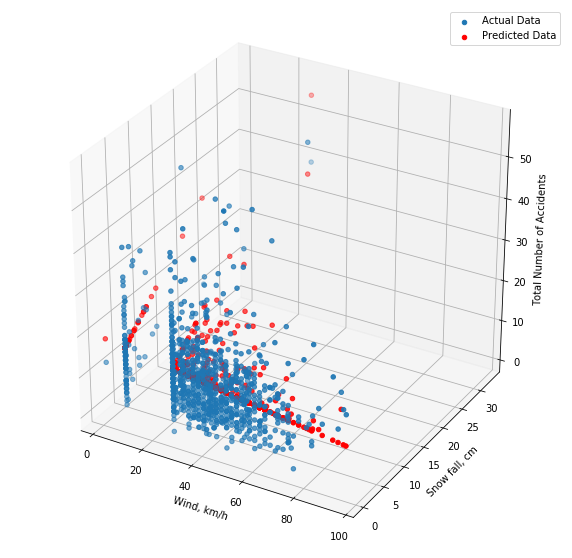

In [362]:
#Linear regression: Model 9: Y (accidents)=aX1(snow)+bX2(wind)+C

ones=np.ones(474)

#Training
Y=target_train
X=np.array([wind_train,snow_train,ones])
A_T=np.dot(np.linalg.inv(np.dot(X,X.T)),np.dot(X,Y.T))
A=A_T.T
Y_predict=np.dot(A,X)
E=np.dot(Y-Y_predict,Y-Y_predict)

#Testing
Y_test=target_test
X_test=np.array([wind_test,snow_test,ones])
Y_test_predict=np.dot(A,X_test)
E_test=np.dot(Y_test-Y_test_predict,Y_test-Y_test_predict)

#Whole Data
ones_all=np.ones(948)
Y_all= target_tot_acc
X_all=np.array([wind,snow,ones_all])
Y_predict_all=np.dot(A,X_all)
E_global=np.dot(Y_predict_all-Y_all,Y_predict_all-Y_all)

print('wind Coefficient = '+str(A[0]))
print('snow Coefficient = '+str(A[1]))
print('Intercept = '+str(A[2]))
print('Training set Least squares error = '+str(E))
print('Testing set Least squares error = '+str(E_test))
print('Global Least squares error = '+str(E_global))

#Plotting
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(wind,snow,Y_all,label='Actual Data')
ax.scatter3D(wind,snow,Y_predict_all, label='Predicted Data',color='red')
ax.set_xlabel('Wind, km/h')
ax.set_ylabel('Snow fall, cm')
ax.set_zlabel('Total Number of Accidents')
ax.legend()
plt.show()

wind Coefficient = -0.11209473423021699
rain Coefficient = 0.010434279307569128
Intercept = 20.566872045737043
Training set Least squares error = 31137.38296761009
Testing set Least squares error = 28988.141801381833
Global Least squares error = 60125.52476899191


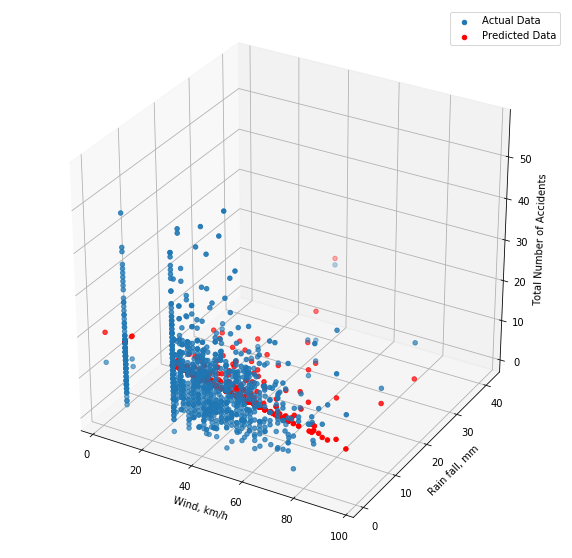

In [363]:
#Linear regression: Model 10: Y (accidents)=aX1(rain)+bX2(wind)+C

ones=np.ones(474)

#Training
Y=target_train
X=np.array([wind_train,rain_train,ones])
A_T=np.dot(np.linalg.inv(np.dot(X,X.T)),np.dot(X,Y.T))
A=A_T.T
Y_predict=np.dot(A,X)
E=np.dot(Y-Y_predict,Y-Y_predict)

#Testing
Y_test=target_test
X_test=np.array([wind_test,rain_test,ones])
Y_test_predict=np.dot(A,X_test)
E_test=np.dot(Y_test-Y_test_predict,Y_test-Y_test_predict)

#Whole Data
ones_all=np.ones(948)
Y_all= target_tot_acc
X_all=np.array([wind,rain,ones_all])
Y_predict_all=np.dot(A,X_all)
E_global=np.dot(Y_predict_all-Y_all,Y_predict_all-Y_all)

print('wind Coefficient = '+str(A[0]))
print('rain Coefficient = '+str(A[1]))
print('Intercept = '+str(A[2]))
print('Training set Least squares error = '+str(E))
print('Testing set Least squares error = '+str(E_test))
print('Global Least squares error = '+str(E_global))

#Plotting
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(wind,rain,Y_all,label='Actual Data')
ax.scatter3D(wind,rain,Y_predict_all, label='Predicted Data',color='red')
ax.set_xlabel('Wind, km/h')
ax.set_ylabel(' Rain fall, mm')
ax.set_zlabel('Total Number of Accidents')
ax.legend()
plt.show()

In [364]:
#Linear regression: Model 11: Y (accidents)=aX1(Temp)+bX2(snow)+CX3(wind)+D

ones=np.ones(474)

#Training
Y=target_train
X=np.array([temp_train,snow_train,wind_train,ones])
A_T=np.dot(np.linalg.inv(np.dot(X,X.T)),np.dot(X,Y.T))
A=A_T.T
Y_predict=np.dot(A,X)
E=np.dot(Y-Y_predict,Y-Y_predict)

#Testing
Y_test=target_test
X_test=np.array([temp_test,snow_test,wind_test,ones])
Y_test_predict=np.dot(A,X_test)
E_test=np.dot(Y_test-Y_test_predict,Y_test-Y_test_predict)

#Whole Data
ones_all=np.ones(948)
Y_all= target_tot_acc
X_all=np.array([temp,snow,wind,ones_all])
Y_predict_all=np.dot(A,X_all)
E_global=np.dot(Y_predict_all-Y_all,Y_predict_all-Y_all)

print('Temperature Coefficient = '+str(A[0]))
print('snow Coefficient = '+str(A[1]))
print('Wind Coefficient = '+str(A[2]))
print('Intercept = '+str(A[3]))
print('Training set Least squares error = '+str(E))
print('Testing set Least squares error = '+str(E_test))
print('Global Least squares error = '+str(E_global))


Temperature Coefficient = -0.1611086600082985
snow Coefficient = 1.0249873420998523
Wind Coefficient = -0.04982518200381403
Intercept = 18.06064414197752
Training set Least squares error = 26452.35069521096
Testing set Least squares error = 23035.236785862555
Global Least squares error = 49487.58748107352


In [365]:
#Linear regression: Model 12: Y (accidents)=aX1(Temp)+bX2(snow)+CX3(rain)+D

ones=np.ones(474)

#Training
Y=target_train
X=np.array([temp_train,snow_train,rain_train,ones])
A_T=np.dot(np.linalg.inv(np.dot(X,X.T)),np.dot(X,Y.T))
A=A_T.T
Y_predict=np.dot(A,X)
E=np.dot(Y-Y_predict,Y-Y_predict)

#Testing
Y_test=target_test
X_test=np.array([temp_test,snow_test,rain_test,ones])
Y_test_predict=np.dot(A,X_test)
E_test=np.dot(Y_test-Y_test_predict,Y_test-Y_test_predict)

#Whole Data
ones_all=np.ones(948)
Y_all= target_tot_acc
X_all=np.array([temp,snow,rain,ones_all])
Y_predict_all=np.dot(A,X_all)
E_global=np.dot(Y_predict_all-Y_all,Y_predict_all-Y_all)

print('Temperature Coefficient = '+str(A[0]))
print('snow Coefficient = '+str(A[1]))
print('Rain Coefficient = '+str(A[2]))
print('Intercept = '+str(A[3]))
print('Training set Least squares error = '+str(E))
print('Testing set Least squares error = '+str(E_test))
print('Global Least squares error = '+str(E_global))


Temperature Coefficient = -0.1876565212033141
snow Coefficient = 1.045011916768015
Rain Coefficient = 0.0737191595167841
Intercept = 16.063236177770385
Training set Least squares error = 26680.954881543636
Testing set Least squares error = 22771.619222860525
Global Least squares error = 49452.57410440415


In [366]:
#Linear regression: Model 13: Y (accidents)=aX1(Temp)+bX2(wind)+CX3(rain)+D

ones=np.ones(474)

#Training
Y=target_train
X=np.array([temp_train,wind_train,rain_train,ones])
A_T=np.dot(np.linalg.inv(np.dot(X,X.T)),np.dot(X,Y.T))
A=A_T.T
Y_predict=np.dot(A,X)
E=np.dot(Y-Y_predict,Y-Y_predict)

#Testing
Y_test=target_test
X_test=np.array([temp_test,wind_test,rain_test,ones])
Y_test_predict=np.dot(A,X_test)
E_test=np.dot(Y_test-Y_test_predict,Y_test-Y_test_predict)

#Whole Data
ones_all=np.ones(948)
Y_all= target_tot_acc
X_all=np.array([temp,wind,rain,ones_all])
Y_predict_all=np.dot(A,X_all)
E_global=np.dot(Y_predict_all-Y_all,Y_predict_all-Y_all)

print('Temperature Coefficient = '+str(A[0]))
print('wind Coefficient = '+str(A[1]))
print('Rain Coefficient = '+str(A[2]))
print('Intercept = '+str(A[3]))
print('Training set Least squares error = '+str(E))
print('Testing set Least squares error = '+str(E_test))
print('Global Least squares error = '+str(E_global))


Temperature Coefficient = -0.2108141451922415
wind Coefficient = -0.0605493766557923
Rain Coefficient = 0.0935814997183333
Intercept = 19.184588814219097
Training set Least squares error = 28857.90490008816
Testing set Least squares error = 26110.464076376382
Global Least squares error = 54968.36897646455


In [367]:

#Linear regression: Model 14: Y (accidents)=aX1(Temp)+bX2(snow)+CX3(rain)+DX4(wind)+E

ones=np.ones(474)

#Training
Y=target_train
X=np.array([temp_train,snow_train,rain_train,wind_train,ones])
A_T=np.dot(np.linalg.inv(np.dot(X,X.T)),np.dot(X,Y.T))
A=A_T.T
Y_predict=np.dot(A,X)
E=np.dot(Y-Y_predict,Y-Y_predict)

#Testing
Y_test=target_test
X_test=np.array([temp_test,snow_test,rain_test,wind_test,ones])
Y_test_predict=np.dot(A,X_test)
E_test=np.dot(Y_test-Y_test_predict,Y_test-Y_test_predict)

#Whole Data
ones_all=np.ones(948)
Y_all= target_tot_acc
X_all=np.array([temp,snow,rain,wind,ones_all])
Y_predict_all=np.dot(A,X_all)
E_global=np.dot(Y_predict_all-Y_all,Y_predict_all-Y_all)

print('Temperature Coefficient = '+str(A[0]))
print('snow Coefficient = '+str(A[1]))
print('rain Coefficient = '+str(A[2]))
print('wind Coefficient = '+str(A[3]))
print('Intercept = '+str(A[4]))
print('Training set Least squares error = '+str(E))
print('Testing set Least squares error = '+str(E_test))
print('Global Least squares error = '+str(E_global))


Temperature Coefficient = -0.16396852742213774
snow Coefficient = 1.0262092303361858
rain Coefficient = 0.10125625607930111
wind Coefficient = -0.05185290344594318
Intercept = 18.089031191181064
Training set Least squares error = 26413.958359292592
Testing set Least squares error = 23126.68255603392
Global Least squares error = 49540.64091532653


Temperature and snow Coefficient = -0.13896922735745673
Intercept = 15.39740738616761
Training set Least squares error = 28777.74543033369
Testing set Least squares error = 23566.084162836378
Global Least squares error = 52343.82959317005


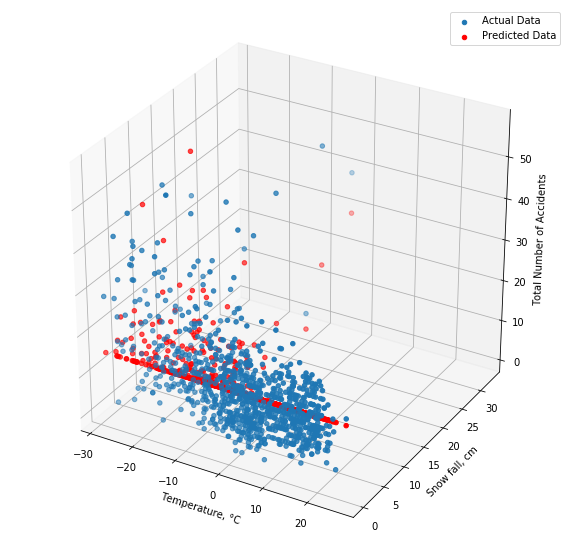

In [368]:

#Linear regression: Model 15: Y (accidents)=aX1(Temp)*X2(snow)+b

ones=np.ones(474)

#Training
Y=target_train
X=np.array([np.multiply(temp_train,snow_train),ones])
A_T=np.dot(np.linalg.inv(np.dot(X,X.T)),np.dot(X,Y.T))
A=A_T.T
Y_predict=np.dot(A,X)
E=np.dot(Y-Y_predict,Y-Y_predict)

#Testing
Y_test=target_test
X_test=np.array([np.multiply(temp_test,snow_test),ones])
Y_test_predict=np.dot(A,X_test)
E_test=np.dot(Y_test-Y_test_predict,Y_test-Y_test_predict)

#Whole Data
ones_all=np.ones(948)
Y_all= target_tot_acc
X_all=np.array([np.multiply(temp,snow),ones_all])
Y_predict_all=np.dot(A,X_all)
E_global=np.dot(Y_predict_all-Y_all,Y_predict_all-Y_all)

print('Temperature and snow Coefficient = '+str(A[0]))
print('Intercept = '+str(A[1]))
print('Training set Least squares error = '+str(E))
print('Testing set Least squares error = '+str(E_test))
print('Global Least squares error = '+str(E_global))

#Plotting
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(temp,snow,Y_all,label='Actual Data')
ax.scatter3D(temp,snow,Y_predict_all, label='Predicted Data',color='red')
ax.set_xlabel('Temperature, °C')
ax.set_ylabel('Snow fall, cm')
ax.set_zlabel('Total Number of Accidents')
ax.legend()
plt.show()

Temperature and rain Coefficient = -0.0036546227289143973
Intercept = 16.0157958324448
Training set Least squares error = 32569.21259418097
Testing set Least squares error = 28724.299785757474
Global Least squares error = 61293.512379938475


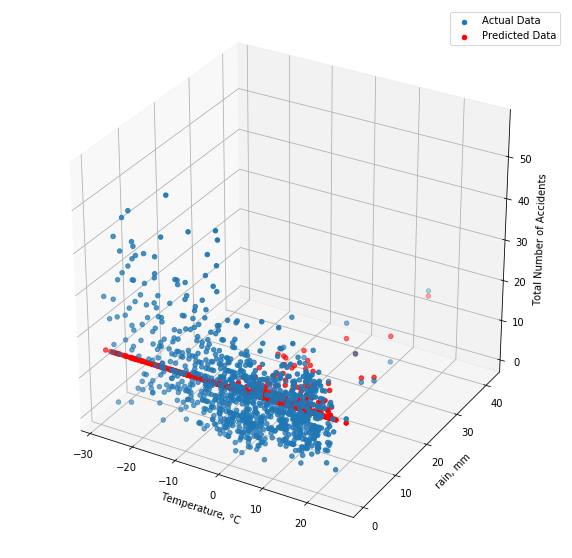

In [369]:
#Linear regression: Model 16: Y (accidents)=aX1(Temp)*X2(rain)+b

ones=np.ones(474)

#Training
Y=target_train
X=np.array([np.multiply(temp_train,rain_train),ones])
A_T=np.dot(np.linalg.inv(np.dot(X,X.T)),np.dot(X,Y.T))
A=A_T.T
Y_predict=np.dot(A,X)
E=np.dot(Y-Y_predict,Y-Y_predict)

#Testing
Y_test=target_test
X_test=np.array([np.multiply(temp_test,rain_test),ones])
Y_test_predict=np.dot(A,X_test)
E_test=np.dot(Y_test-Y_test_predict,Y_test-Y_test_predict)

#Whole Data
ones_all=np.ones(948)
Y_all= target_tot_acc
X_all=np.array([np.multiply(temp,rain),ones_all])
Y_predict_all=np.dot(A,X_all)
E_global=np.dot(Y_predict_all-Y_all,Y_predict_all-Y_all)

print('Temperature and rain Coefficient = '+str(A[0]))
print('Intercept = '+str(A[1]))
print('Training set Least squares error = '+str(E))
print('Testing set Least squares error = '+str(E_test))
print('Global Least squares error = '+str(E_global))

#Plotting
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(temp,rain,Y_all,label='Actual Data')
ax.scatter3D(temp,rain,Y_predict_all, label='Predicted Data',color='red')
ax.set_xlabel('Temperature, °C')
ax.set_ylabel('rain, mm')
ax.set_zlabel('Total Number of Accidents')
ax.legend()
plt.show()

In [370]:
#Linear regression: Model 17: Log(Y (accidents))=aX1(Temp)+bX2(snow)+CX3(rain)+DX4(wind)+E

ones=np.ones(474)

#Training
Y=np.log(target_train)
X=np.array([temp_train,snow_train,rain_train,wind_train,ones])
A_T=np.dot(np.linalg.inv(np.dot(X,X.T)),np.dot(X,Y.T))
A=A_T.T
Y_predict=np.dot(A,X)
E=np.dot(Y-Y_predict,Y-Y_predict)

#Testing
Y_test=np.log(target_test)
X_test=np.array([temp_test,snow_test,rain_test,wind_test,ones])
Y_test_predict=np.dot(A,X_test)
E_test=np.dot(Y_test-Y_test_predict,Y_test-Y_test_predict)

#Whole Data
ones_all=np.ones(948)
Y_all= np.log(target_tot_acc)
X_all=np.array([temp,snow,rain,wind,ones_all])
Y_predict_all=np.dot(A,X_all)
E_global=np.dot(Y_predict_all-Y_all,Y_predict_all-Y_all)

print('Temperature Coefficient = '+str(A[0]))
print('snow Coefficient = '+str(A[1]))
print('rain Coefficient = '+str(A[2]))
print('wind Coefficient = '+str(A[3]))
print('Intercept = '+str(A[4]))
print('Training set Least squares error = '+str(E))
print('Testing set Least squares error = '+str(E_test))
print('Global Least squares error = '+str(E_global))

Temperature Coefficient = -0.007549324955886394
snow Coefficient = 0.04700159126165149
rain Coefficient = 0.011530308571561274
wind Coefficient = -0.0050938349492511414
Intercept = 2.8385986684466538
Training set Least squares error = 125.67608462468763
Testing set Least squares error = 108.4124370185077
Global Least squares error = 234.0885216431953


Temperature Coefficient = -0.011983389683165035
Intercept = 2.6797423136059875
Training set Least squares error = 134.06434855981777
Testing set Least squares error = 110.20676885366679
Global Least squares error = 244.27111741348452


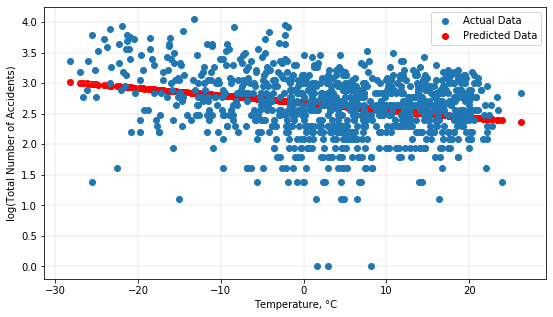

In [371]:
#Linear regression: Model 18: Log(Y (accidents))=aX1(Temp)+E

ones=np.ones(474)

#Training
Y=np.log(target_train)
X=np.array([temp_train,ones])
A_T=np.dot(np.linalg.inv(np.dot(X,X.T)),np.dot(X,Y.T))
A=A_T.T
Y_predict=np.dot(A,X)
E=np.dot(Y-Y_predict,Y-Y_predict)

#Testing
Y_test=np.log(target_test)
X_test=np.array([temp_test,ones])
Y_test_predict=np.dot(A,X_test)
E_test=np.dot(Y_test-Y_test_predict,Y_test-Y_test_predict)

#Whole Data
ones_all=np.ones(948)
Y_all= np.log(target_tot_acc)
X_all=np.array([temp,ones_all])
Y_predict_all=np.dot(A,X_all)
E_global=np.dot(Y_predict_all-Y_all,Y_predict_all-Y_all)

print('Temperature Coefficient = '+str(A[0]))
print('Intercept = '+str(A[1]))
print('Training set Least squares error = '+str(E))
print('Testing set Least squares error = '+str(E_test))
print('Global Least squares error = '+str(E_global))
fig, ax=plt.subplots(figsize=(9,5))
plt.grid(linewidth=0.25)
Scatter, =ax.plot(temp,Y_all,'o',label="Actual Data")
ax.scatter(temp,Y_predict_all,color='red',label="Predicted Data")
ax.set_xlabel('Temperature, °C')
ax.set_ylabel('log(Total Number of Accidents)')
ax.legend()
plt.show()

In [372]:
#Linear regression: Model 19: Log(Y (accidents))=aX1(Temp)+bX2(snow)+DX4(wind)+E

ones=np.ones(474)

#Training
Y=np.log(target_train)
X=np.array([temp_train,snow_train,wind_train,ones])
A_T=np.dot(np.linalg.inv(np.dot(X,X.T)),np.dot(X,Y.T))
A=A_T.T
Y_predict=np.dot(A,X)
E=np.dot(Y-Y_predict,Y-Y_predict)

#Testing
Y_test=np.log(target_test)
X_test=np.array([temp_test,snow_test,wind_test,ones])
Y_test_predict=np.dot(A,X_test)
E_test=np.dot(Y_test-Y_test_predict,Y_test-Y_test_predict)

#Whole Data
ones_all=np.ones(948)
Y_all= np.log(target_tot_acc)
X_all=np.array([temp,snow,wind,ones_all])
Y_predict_all=np.dot(A,X_all)
E_global=np.dot(Y_predict_all-Y_all,Y_predict_all-Y_all)

print('Temperature Coefficient = '+str(A[0]))
print('snow Coefficient = '+str(A[1]))
print('wind Coefficient = '+str(A[2]))
print('Intercept = '+str(A[3]))
print('Training set Least squares error = '+str(E))
print('Testing set Least squares error = '+str(E_test))
print('Global Least squares error = '+str(E_global))

Temperature Coefficient = -0.007223664547017589
snow Coefficient = 0.04686245172647019
wind Coefficient = -0.004862933128166491
Intercept = 2.835366162629956
Training set Least squares error = 126.17391646054688
Testing set Least squares error = 107.62211324404834
Global Least squares error = 233.79602970459516


Temperature Coefficient = -0.009542805276216898
snow Coefficient = 0.04867628232945853
Intercept = 2.6440701492661347
Training set Least squares error = 128.54747219442567
Testing set Least squares error = 104.87016285486095
Global Least squares error = 233.41763504928656


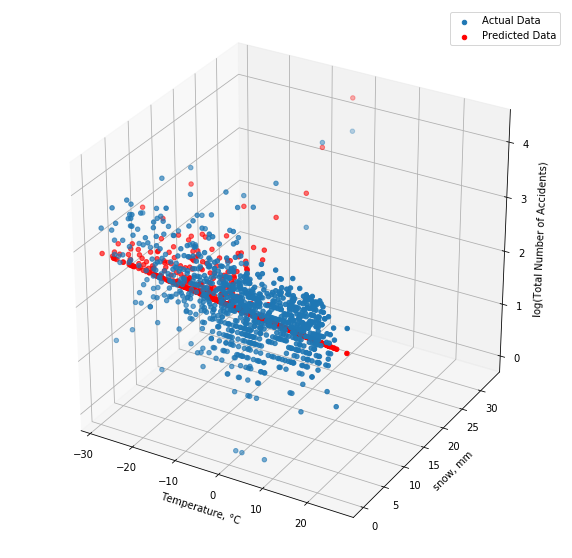

In [373]:
#Linear regression: Model 20: Log(Y (accidents))=aX1(Temp)+bX2(snow)+E

ones=np.ones(474)

#Training
Y=np.log(target_train)
X=np.array([temp_train,snow_train,ones])
A_T=np.dot(np.linalg.inv(np.dot(X,X.T)),np.dot(X,Y.T))
A=A_T.T
Y_predict=np.dot(A,X)
E=np.dot(Y-Y_predict,Y-Y_predict)

#Testing
Y_test=np.log(target_test)
X_test=np.array([temp_test,snow_test,ones])
Y_test_predict=np.dot(A,X_test)
E_test=np.dot(Y_test-Y_test_predict,Y_test-Y_test_predict)

#Whole Data
ones_all=np.ones(948)
Y_all= np.log(target_tot_acc)
X_all=np.array([temp,snow,ones_all])
Y_predict_all=np.dot(A,X_all)
E_global=np.dot(Y_predict_all-Y_all,Y_predict_all-Y_all)

print('Temperature Coefficient = '+str(A[0]))
print('snow Coefficient = '+str(A[1]))

print('Intercept = '+str(A[2]))
print('Training set Least squares error = '+str(E))
print('Testing set Least squares error = '+str(E_test))
print('Global Least squares error = '+str(E_global))

#Plotting
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(temp,snow,Y_all,label='Actual Data')
ax.scatter3D(temp,snow,Y_predict_all, label='Predicted Data',color='red')
ax.set_xlabel('Temperature, °C')
ax.set_ylabel('snow, mm')
ax.set_zlabel('log(Total Number of Accidents)')
ax.legend()
plt.show()

Temperature Coefficient = -0.012302814838895636
rain Coefficient = 0.008238197468961345
Intercept = 2.675680105543683
Training set Least squares error = 133.8074210788777
Testing set Least squares error = 110.66292472207935
Global Least squares error = 244.4703458009571


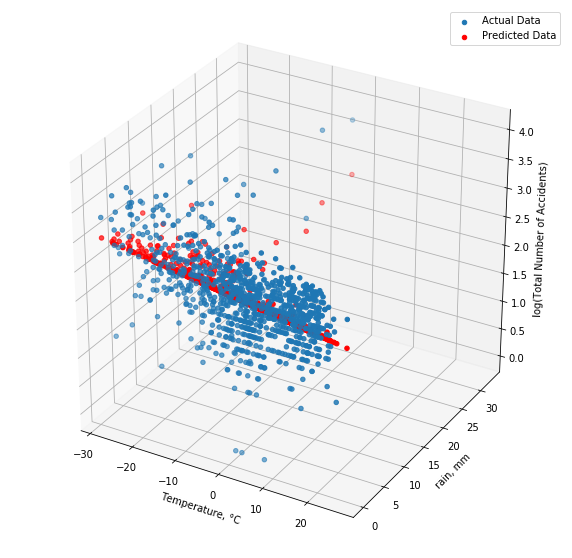

In [374]:
#Linear regression: Model 21: Log(Y (accidents))=aX1(Temp)+bX2(rain)+E

ones=np.ones(474)

#Training
Y=np.log(target_train)
X=np.array([temp_train,rain_train,ones])
A_T=np.dot(np.linalg.inv(np.dot(X,X.T)),np.dot(X,Y.T))
A=A_T.T
Y_predict=np.dot(A,X)
E=np.dot(Y-Y_predict,Y-Y_predict)

#Testing
Y_test=np.log(target_test)
X_test=np.array([temp_test,rain_test,ones])
Y_test_predict=np.dot(A,X_test)
E_test=np.dot(Y_test-Y_test_predict,Y_test-Y_test_predict)

#Whole Data
ones_all=np.ones(948)
Y_all= np.log(target_tot_acc)
X_all=np.array([temp,rain,ones_all])
Y_predict_all=np.dot(A,X_all)
E_global=np.dot(Y_predict_all-Y_all,Y_predict_all-Y_all)

print('Temperature Coefficient = '+str(A[0]))
print('rain Coefficient = '+str(A[1]))

print('Intercept = '+str(A[2]))
print('Training set Least squares error = '+str(E))
print('Testing set Least squares error = '+str(E_test))
print('Global Least squares error = '+str(E_global))

#Plotting
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(temp,snow,Y_all,label='Actual Data')
ax.scatter3D(temp,snow,Y_predict_all, label='Predicted Data',color='red')
ax.set_xlabel('Temperature, °C')
ax.set_ylabel('rain, mm')
ax.set_zlabel('log(Total Number of Accidents)')
ax.legend()
plt.show()

Temperature Coefficient = -0.009876344709485993
snow Coefficient = 0.04884869672578479
rain Coefficient = 0.008825167382750437
Intercept = 2.6395921566881047
Training set Least squares error = 128.25269756552137
Testing set Least squares error = 105.35337439118895
Global Least squares error = 233.60607195671028


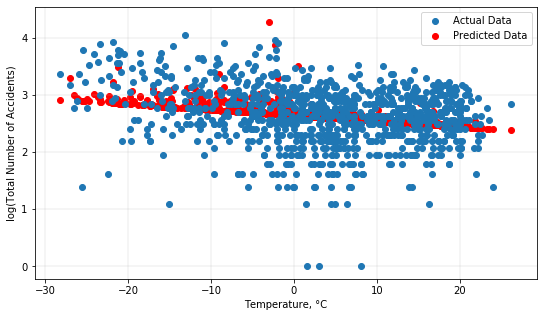

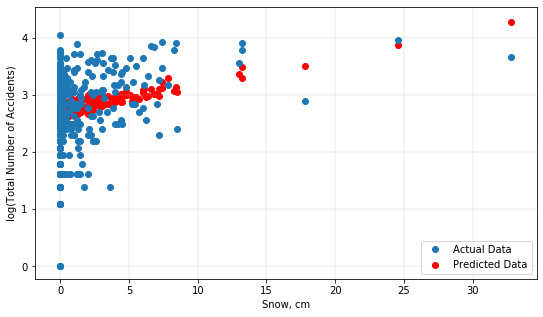

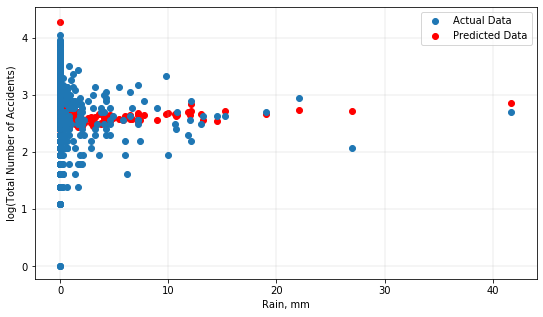

In [376]:
#Linear regression: Model 22: Log(Y (accidents))=aX1(Temp)+bX2(snow)+CX3(rain)+E

ones=np.ones(474)

#Training
Y=np.log(target_train)
X=np.array([temp_train,snow_train,rain_train,ones])
A_T=np.dot(np.linalg.inv(np.dot(X,X.T)),np.dot(X,Y.T))
A=A_T.T
Y_predict=np.dot(A,X)
E=np.dot(Y-Y_predict,Y-Y_predict)

#Testing
Y_test=np.log(target_test)
X_test=np.array([temp_test,snow_test,rain_test,ones])
Y_test_predict=np.dot(A,X_test)
E_test=np.dot(Y_test-Y_test_predict,Y_test-Y_test_predict)

#Whole Data
ones_all=np.ones(948)
Y_all= np.log(target_tot_acc)
X_all=np.array([temp,snow,rain,ones_all])
Y_predict_all=np.dot(A,X_all)
E_global=np.dot(Y_predict_all-Y_all,Y_predict_all-Y_all)

print('Temperature Coefficient = '+str(A[0]))
print('snow Coefficient = '+str(A[1]))
print('rain Coefficient = '+str(A[2]))
print('Intercept = '+str(A[3]))
print('Training set Least squares error = '+str(E))
print('Testing set Least squares error = '+str(E_test))
print('Global Least squares error = '+str(E_global))

fig, ax=plt.subplots(figsize=(9,5))
plt.grid(linewidth=0.25)
Scatter, =ax.plot(temp,Y_all,'o',label="Actual Data")
ax.scatter(temp,Y_predict_all,color='red',label="Predicted Data")
ax.set_xlabel('Temperature, °C')
ax.set_ylabel('log(Total Number of Accidents)')
ax.legend()
plt.show()

fig, ax=plt.subplots(figsize=(9,5))
plt.grid(linewidth=0.25)
Scatter, =ax.plot(snow,Y_all,'o',label="Actual Data")
ax.scatter(snow,Y_predict_all,color='red',label="Predicted Data")
ax.set_xlabel('Snow, cm')
ax.set_ylabel('log(Total Number of Accidents)')
ax.legend()
plt.show()

fig, ax=plt.subplots(figsize=(9,5))
plt.grid(linewidth=0.25)
Scatter, =ax.plot(rain,Y_all,'o',label="Actual Data")
ax.scatter(rain,Y_predict_all,color='red',label="Predicted Data")
ax.set_xlabel('Rain, mm')
ax.set_ylabel('log(Total Number of Accidents)')
ax.legend()
plt.show()